## 🎯 Lecture 2: Feature Engineering in Action
---
### 🔍 Key Learning Objectives:
1️⃣ Understand different types of feature transformations  
2️⃣ Apply **scaling, encoding, and binning** techniques  
3️⃣ Explore **interaction features** and polynomial transformations  

---
## 🚀 Why Feature Engineering Matters?
- Raw data is often **not enough** for model performance.
- Transformations can **enhance patterns** and improve model accuracy.
- Properly engineered features help models **generalize better**.

---
## 🔬 Hands-on: Feature Transformations
### ✅ 1. Handling Missing Values
- **Imputation**: Fill missing values with mean, median, or mode.
- **Forward/Backward Filling**: Fill missing data based on previous values.

### ✅ 2. Scaling & Normalization
- **Min-Max Scaling**: Scale values between 0 and 1.
- **Standardization**: Transform data to have a **mean of 0** and **unit variance**.

### ✅ 3. Encoding Categorical Variables
- **One-Hot Encoding (OHE)**: Convert categorical features into binary columns.
- **Label Encoding**: Assign numerical values to categorical labels.

---

# 📌 Import necessary libraries for data analysis and preprocessing

In [2]:
# 📌 Import necessary libraries for data analysis and preprocessing
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Statistical data visualization


In [3]:
# Load the dataset
df = pd.read_csv('loan_applications.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   application_id     50000 non-null  int64  
 1   application_date   50000 non-null  object 
 2   age                50000 non-null  int64  
 3   gender             50000 non-null  object 
 4   education          50000 non-null  object 
 5   occupation         50000 non-null  object 
 6   employment_length  42840 non-null  float64
 7   income             47555 non-null  float64
 8   loan_amount        50000 non-null  float64
 9   loan_term          50000 non-null  int64  
 10  interest_rate      50000 non-null  float64
 11  monthly_payment    50000 non-null  float64
 12  credit_score       47422 non-null  float64
 13  existing_loans     47487 non-null  float64
 14  previous_defaults  50000 non-null  int64  
 15  city               50000 non-null  object 
 16  default            500

In [4]:
df.head()

,application_id,application_date,age,gender,education,occupation,employment_length,income,loan_amount,loan_term,interest_rate,monthly_payment,credit_score,existing_loans,previous_defaults,city,default
0,1,2020-01-05,40,M,Master,Self-employed,13.573526,40298.38,95254.57,48,10.95,2459.46,781.0,0.0,0,CITY_22,0
1,2,2020-05-21,33,M,Bachelor,Salaried,3.061310,38167.11,140514.31,60,17.12,3501.53,687.0,1.0,0,CITY_41,0
2,3,2020-09-24,42,F,Bachelor,Unemployed,12.040059,8666.27,13340.61,60,11.89,296.01,795.0,0.0,0,CITY_68,0
3,4,2020-05-10,53,F,High School,Salaried,8.490862,33093.00,73008.42,60,12.89,1657.01,724.0,2.0,0,CITY_8,0
4,5,2020-05-15,32,M,Master,Salaried,0.782913,41115.42,51399.26,12,7.58,4461.24,510.0,0.0,0,CITY_33,1


# 📌 Define feature categories

In [5]:
# 📌 Define feature categories
numerical_features = ['age', 'income', 'loan_amount', 'loan_term', 'interest_rate',
                      'monthly_payment', 'credit_score', 'employment_length']

categorical_features = ['gender', 'education', 'occupation', 'city']
temporal_features = ['application_date']
target = 'default'

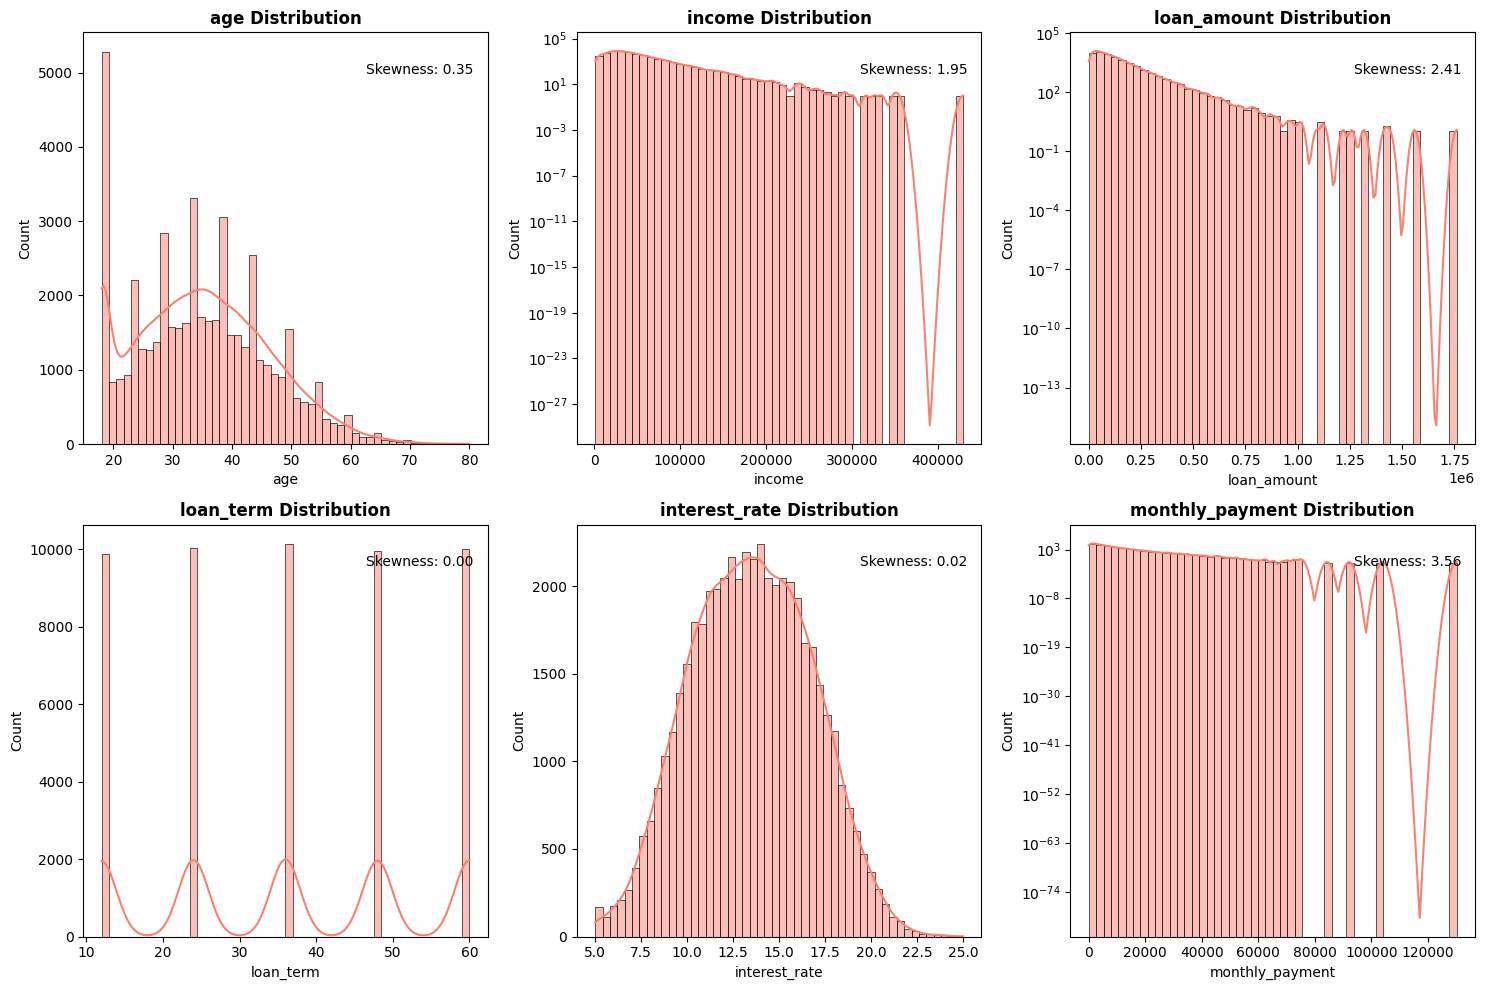

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# 📌 Define feature categories
numerical_features = ['age', 'income', 'loan_amount', 'loan_term', 'interest_rate',
                      'monthly_payment', 'credit_score', 'employment_length']

categorical_features = ['gender', 'education', 'occupation', 'city']
temporal_features = ['application_date']
target = 'default'

# 📊 Analyze distributions of numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features[:6], 1):
    plt.subplot(2, 3, i)  # Create a 2-row, 3-column subplot

    # 🔹 Plot histogram with KDE (Kernel Density Estimate)
    sns.histplot(df[feature].dropna(), kde=True, color='salmon', bins=50)
    plt.title(f"{feature} Distribution", fontsize=12, fontweight='bold')

    # 📌 Add skewness information
    skewness = stats.skew(df[feature].dropna())
    plt.text(0.7, 0.9, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, fontsize=10, color='black')

    # 🔄 Log transformation if highly skewed
    if abs(skewness) > 1:
        plt.yscale('log')  # Log scale for better visibility

# 🔥 Adjust layout for clarity
plt.tight_layout()
plt.show()


#  🎯 Selecting categorical features

<ipython-input-8-4029f3199f26>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette=[colors[idx]], ax=ax)
<ipython-input-8-4029f3199f26>:19: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x=feature, palette=[colors[idx]], ax=ax)
<ipython-input-8-4029f3199f26>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=11)
<ipython-input-8-4029f3199f26>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x

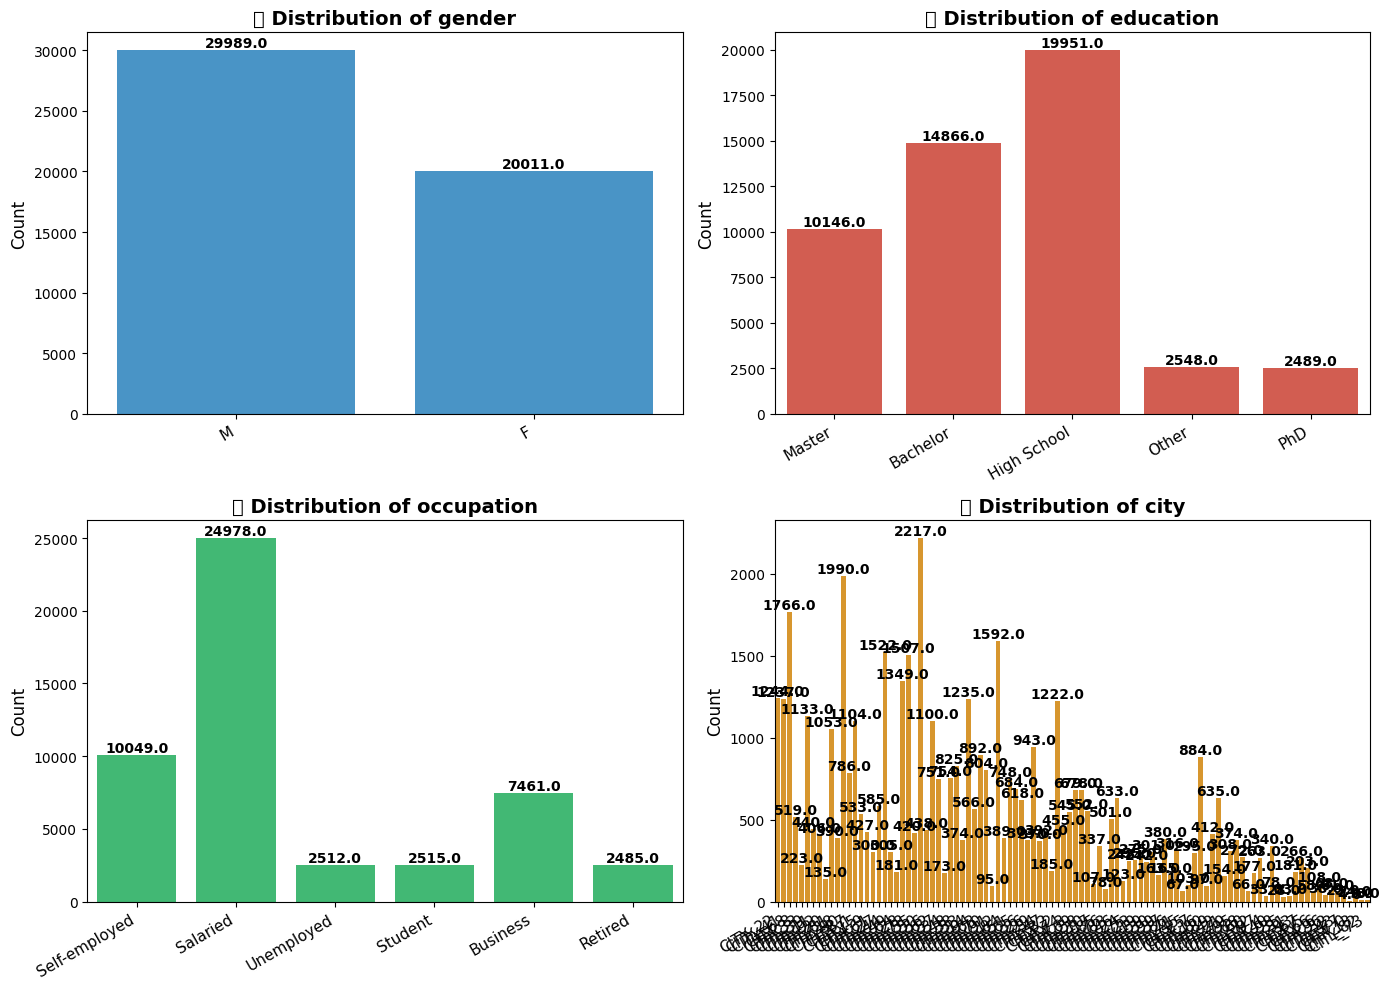

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 Selecting categorical features
categorical_features = ['gender', 'education', 'occupation', 'city']

# 🔹 Set figure size for better visibility
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 🎨 Define color palette for better aesthetics
colors = ["#3498db", "#e74c3c", "#2ecc71", "#f39c12"]

# 🔍 Plot distributions for categorical features
for idx, feature in enumerate(categorical_features):
    row, col = idx // 2, idx % 2  # Determine subplot position
    ax = axes[row, col]  # Select the appropriate subplot

    # 📊 Create count plot for each categorical feature
    sns.countplot(data=df, x=feature, palette=[colors[idx]], ax=ax)

    # 🏷 Improve title formatting
    ax.set_title(f"🔹 Distribution of {feature}", fontsize=14, fontweight='bold')
    ax.set_xlabel("")  # Remove x-axis label
    ax.set_ylabel("Count", fontsize=12)  # Set y-axis label

    # 📌 Annotate bars with values
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

    # 📎 Improve readability of x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=11)

# 🔥 Optimize layout for better visualization
plt.tight_layout()
plt.show()

<ipython-input-9-604243e31248>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="default", y=feature, data=df, palette="Reds")
<ipython-input-9-604243e31248>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="default", y=feature, data=df, palette="Reds")
<ipython-input-9-604243e31248>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="default", y=feature, data=df, palette="Reds")
<ipython-input-9-604243e31248>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va

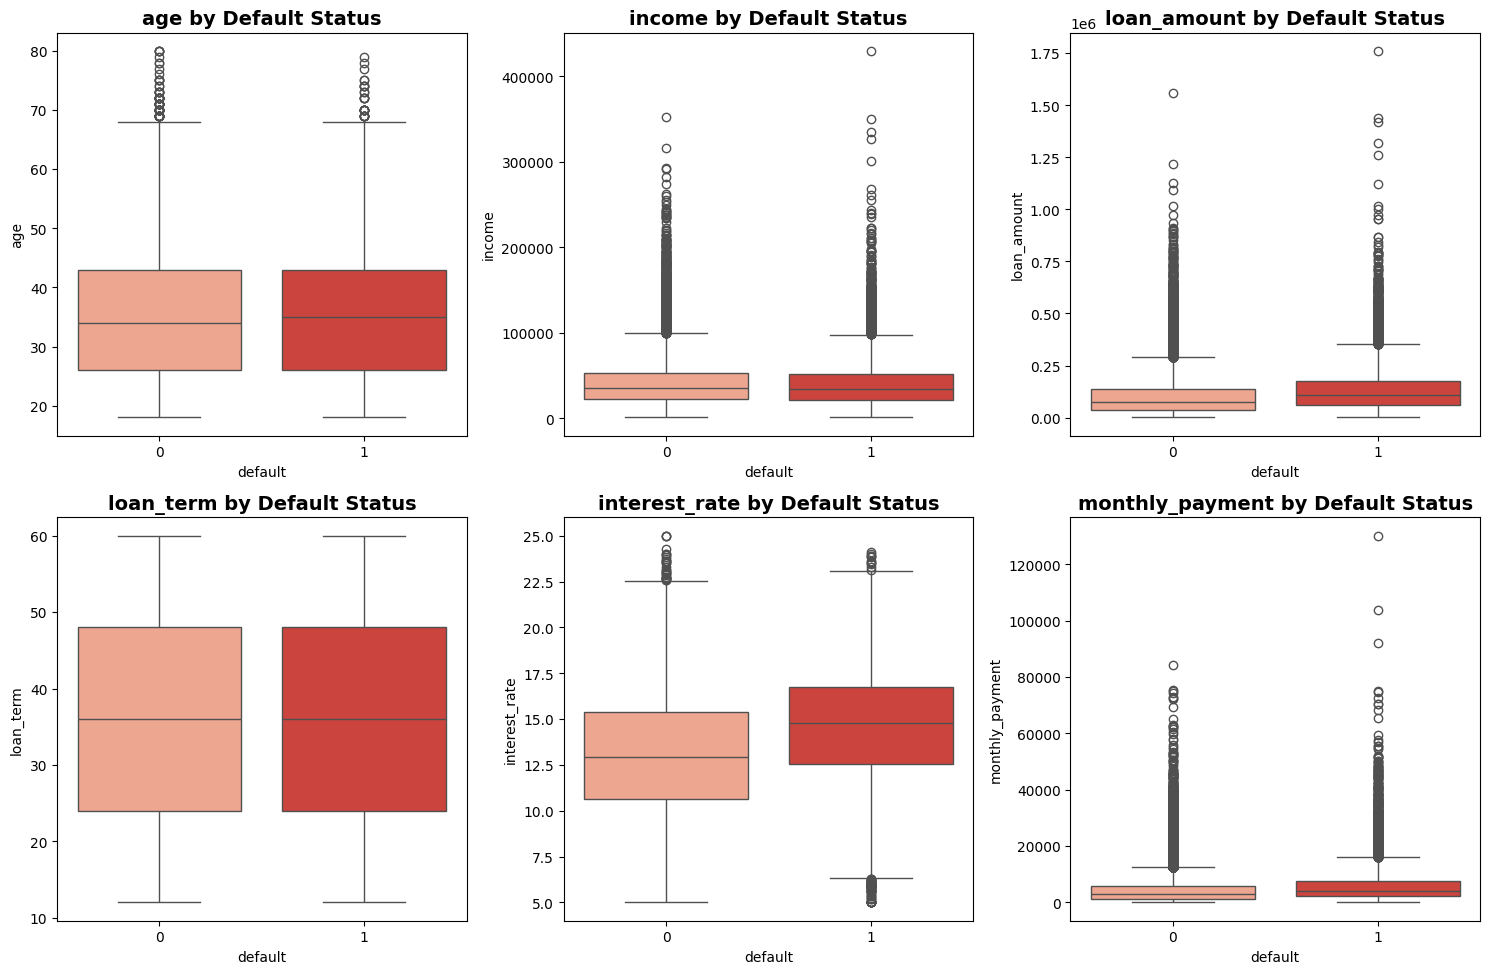

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 Create box plots for numerical features grouped by default status
plt.figure(figsize=(15, 10))

# 🔹 Loop through the first six numerical features and create subplots
for i, feature in enumerate(numerical_features[:6], 1):
    plt.subplot(2, 3, i)  # Arrange plots in a 2x3 grid

    # 📊 Boxplot visualization
    sns.boxplot(x="default", y=feature, data=df, palette="Reds")

    # 🏷 Improve title formatting
    plt.title(f"{feature} by Default Status", fontsize=14, fontweight='bold')

# 🔥 Optimize layout for better visualization
plt.tight_layout()
plt.show()

  # 🔥 Optimize layout


🔹 gender value counts:
gender
M    29989
F    20011
Name: count, dtype: int64


<ipython-input-10-bebaed502fd5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rates.index, y=default_rates.values, palette="Reds", edgecolor="black")
<ipython-input-10-bebaed502fd5>:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


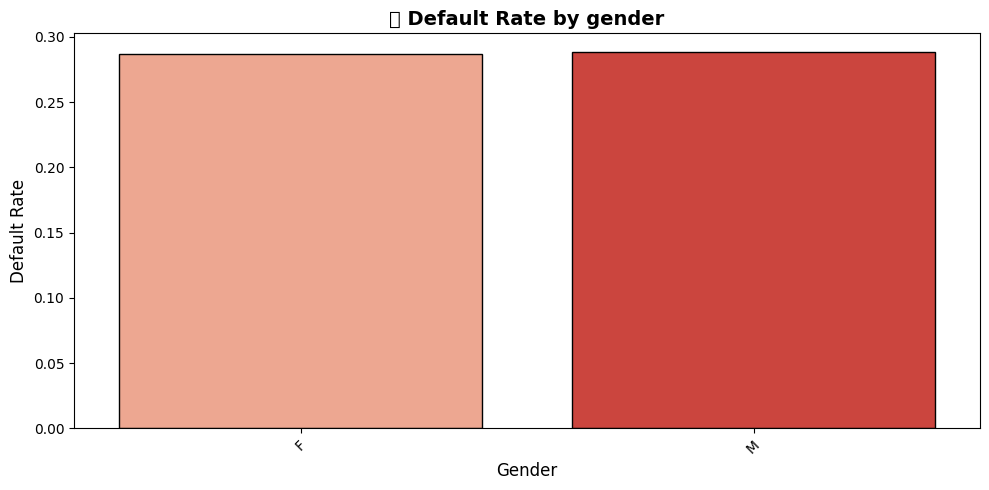

<ipython-input-10-bebaed502fd5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rates.index, y=default_rates.values, palette="Reds", edgecolor="black")



🔹 education value counts:
education
High School    19951
Bachelor       14866
Master         10146
Other           2548
PhD             2489
Name: count, dtype: int64


<ipython-input-10-bebaed502fd5>:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


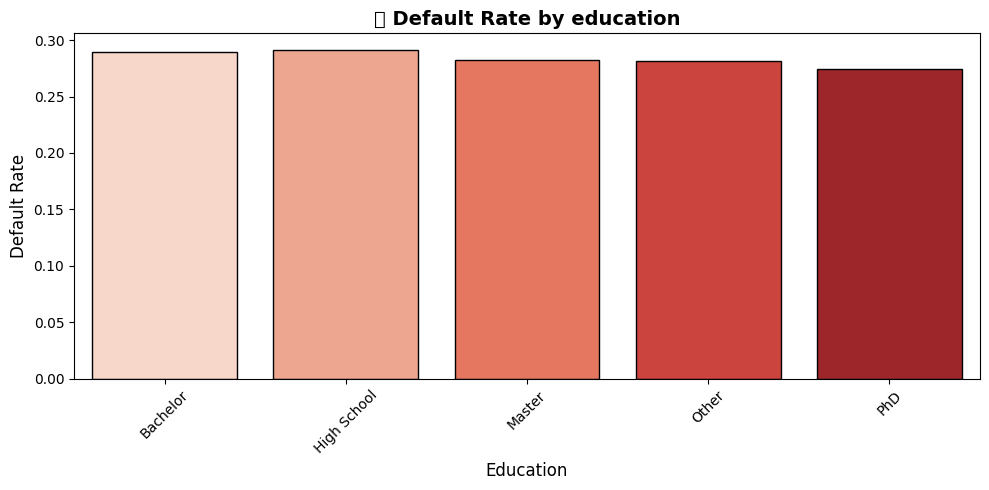

<ipython-input-10-bebaed502fd5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rates.index, y=default_rates.values, palette="Reds", edgecolor="black")



🔹 occupation value counts:
occupation
Salaried         24978
Self-employed    10049
Business          7461
Student           2515
Unemployed        2512
Retired           2485
Name: count, dtype: int64


<ipython-input-10-bebaed502fd5>:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


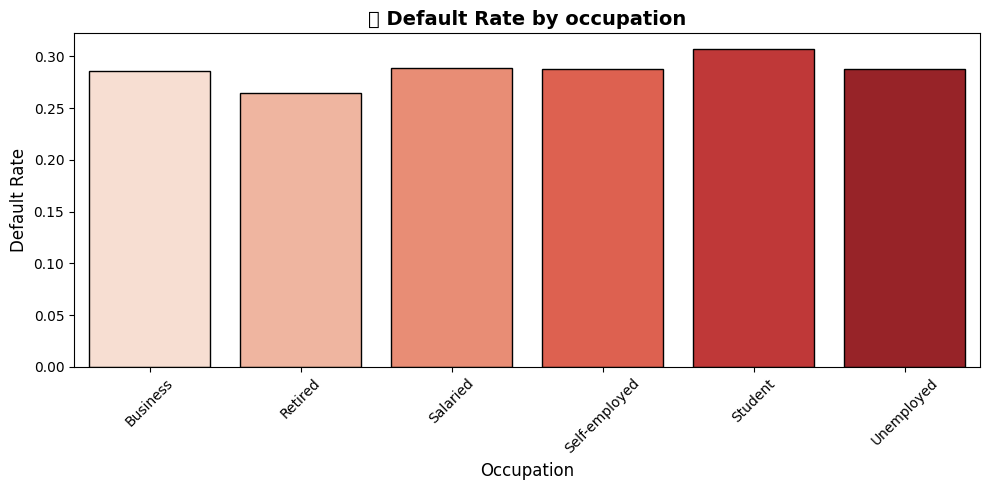

<ipython-input-10-bebaed502fd5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rates.index, y=default_rates.values, palette="Reds", edgecolor="black")



🔹 city value counts:
city
CITY_50    2217
CITY_90    1990
CITY_68    1766
CITY_12    1592
CITY_44    1522
           ... 
CITY_77      25
CITY_13      24
CITY_82       9
CITY_73       8
CITY_0        4
Name: count, Length: 100, dtype: int64


<ipython-input-10-bebaed502fd5>:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


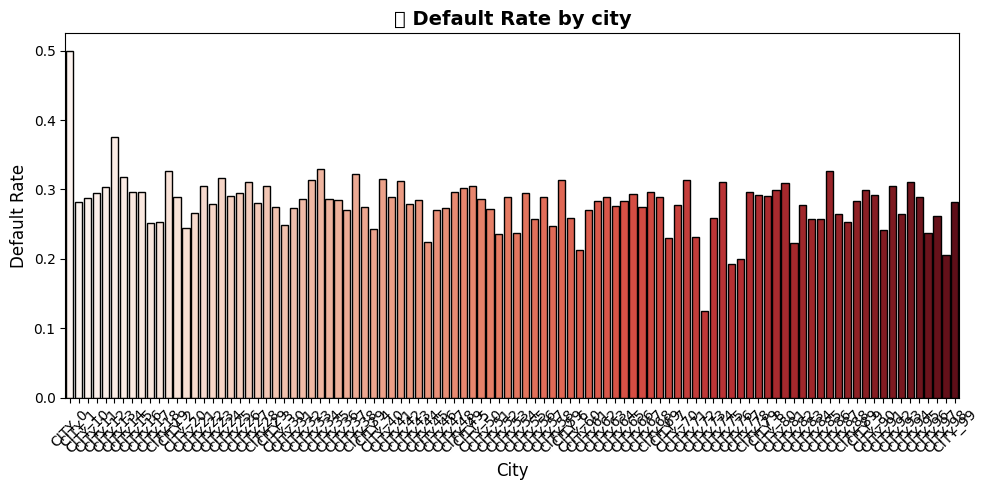

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 Analyze categorical features
for feature in categorical_features:
    print(f"\n🔹 {feature} value counts:")
    print(df[feature].value_counts())

    # 📊 Calculate default rate per category
    default_rates = df.groupby(feature)['default'].mean()

    # 🎨 Enhanced visualization settings
    plt.figure(figsize=(10, 5))
    sns.barplot(x=default_rates.index, y=default_rates.values, palette="Reds", edgecolor="black")

    plt.title(f"📊 Default Rate by {feature}", fontsize=14, fontweight='bold')
    plt.xlabel(feature.capitalize(), fontsize=12)
    plt.ylabel("Default Rate", fontsize=12)

    # 🏷 Improve label readability
    plt.xticks(rotation=45, fontsize=10)

    # 🔥 Optimize layout
    plt.tight_layout()
    plt.show()

# 🔥 Create heatmap with improvements

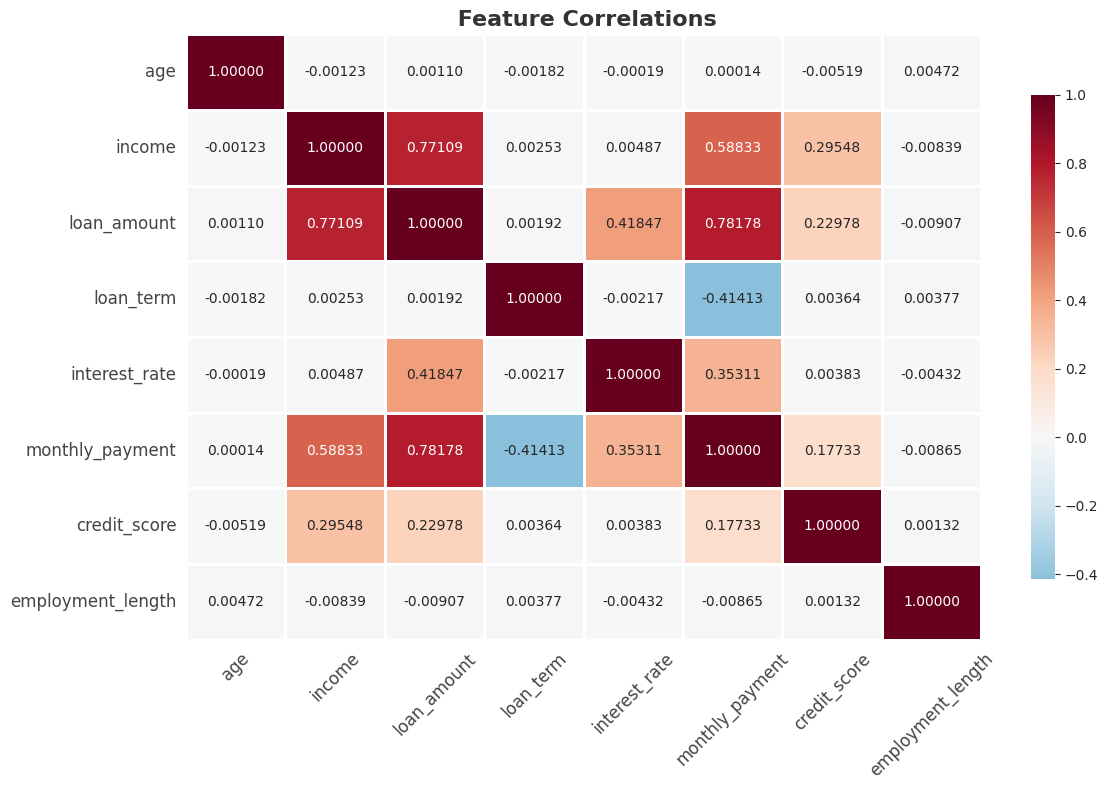

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 Compute the correlation matrix for numerical features
correlation_matrix = df[numerical_features].corr()

# 🎨 Set figure size and style
plt.figure(figsize=(12, 8))
sns.set_style("white")

# 🔥 Create heatmap with improvements
sns.heatmap(
    correlation_matrix,
    annot=True,            # Show correlation values
    fmt=".5f",             # Round values to 5 decimal places to avoid losing precision
    cmap="RdBu_r",         # Improved color contrast
    center=0,              # Center the heatmap at 0
    linewidths=1,          # Add grid lines between cells for better separation
    cbar_kws={"shrink": 0.8},  # Adjust color bar size
    annot_kws={"size": 10}  # Increase annotation font size
)

# 🏷 Improve readability
plt.title(" Feature Correlations", fontsize=16, fontweight="bold", color="#333333")
plt.xticks(rotation=45, fontsize=12, color="#444444")
plt.yticks(fontsize=12, color="#444444")

# 🔧 Optimize layout
plt.tight_layout()
plt.show()

# 📌 Create a scatter plot

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


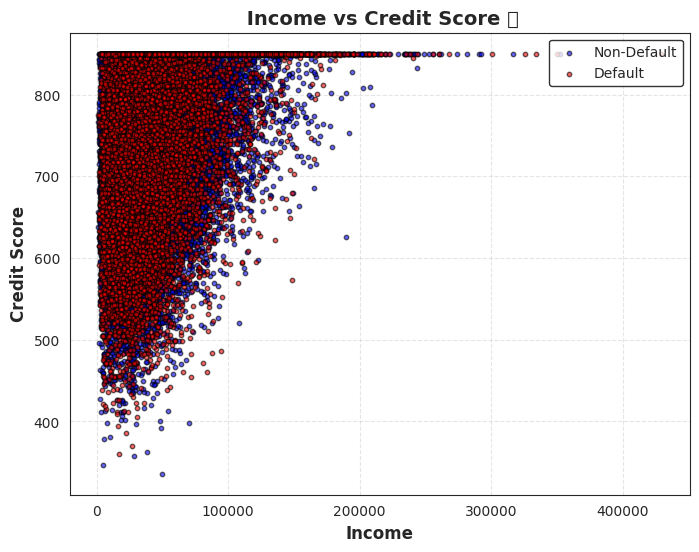

In [12]:
import matplotlib.pyplot as plt

# 📌 Create a scatter plot to analyze the relationship between Income and Credit Score by Default status
plt.figure(figsize=(8, 6))  # Set the figure size for better visualization

# 🔵 Plot data points for Non-Default customers (default = 0)
plt.scatter(df[df['default'] == 0]['income'],  # X-axis: Income
            df[df['default'] == 0]['credit_score'],  # Y-axis: Credit Score
            alpha=0.6,  # Adjust transparency for better overlap visibility
            s=10,  # Increase marker size for better readability
            edgecolor='k',  # Add a black border to markers for clarity
            color='blue',  # Set color to blue for Non-Default category
            label='Non-Default')  # Label for legend

# 🔴 Plot data points for Default customers (default = 1)
plt.scatter(df[df['default'] == 1]['income'],  # X-axis: Income
            df[df['default'] == 1]['credit_score'],  # Y-axis: Credit Score
            alpha=0.6,  # Adjust transparency
            s=10,  # Increase marker size
            edgecolor='k',  # Black border for clarity
            color='red',  # Set color to red for Default category
            label='Default')  # Label for legend

# 🎯 Improve axis labels for readability
plt.xlabel('Income', fontsize=12, fontweight='bold')  # Label for X-axis
plt.ylabel('Credit Score', fontsize=12, fontweight='bold')  # Label for Y-axis
plt.title(' Income vs Credit Score 📊', fontsize=14, fontweight='bold')  # Set chart title

# 🏆 Customize legend for better interpretation
plt.legend(loc='upper right', fontsize=10, frameon=True, edgecolor='black')  # Place legend in upper right

# 📈 Add grid for easier data interpretation
plt.grid(True, linestyle='--', alpha=0.5)  # Dashed grid lines with slight transparency

# 🎬 Display the plot
plt.show()

# 📌 Create a scatter plot to analyze Loan Amount vs Income grouped by Education level

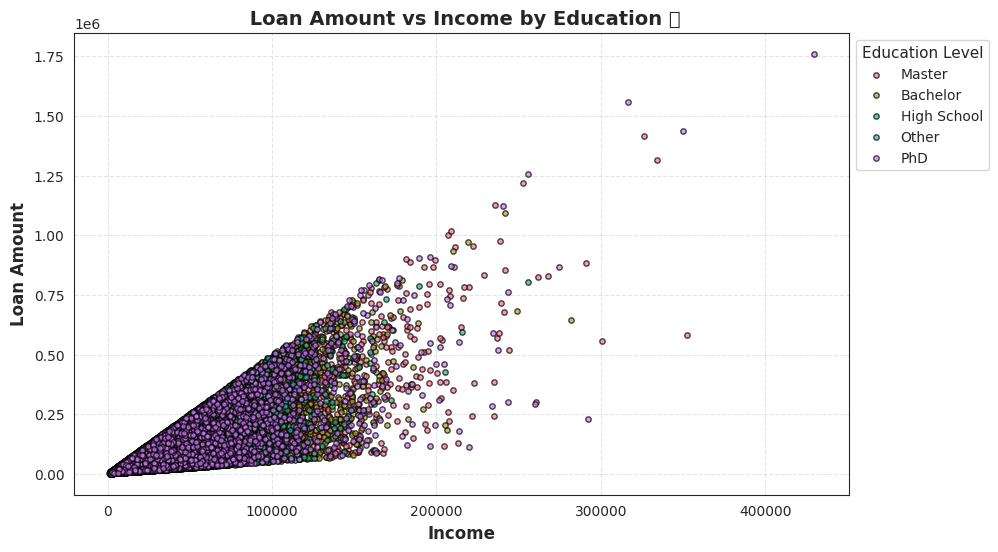

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🎨 Set a color palette for differentiation
colors = sns.color_palette("husl", n_colors=len(df['education'].unique()))

# 📌 Create a scatter plot to analyze Loan Amount vs Income grouped by Education level
plt.figure(figsize=(10, 6))  # Set the figure size for better visualization

# 🔄 Loop through unique education levels and plot scatter points
for i, education in enumerate(df['education'].unique()):
    mask = df['education'] == education  # Create a mask for filtering data

    plt.scatter(df[mask]['income'],  # X-axis: Income
                df[mask]['loan_amount'],  # Y-axis: Loan Amount
                alpha=0.7,  # Adjust transparency for better overlap visibility
                s=15,  # Increase marker size for better readability
                edgecolor='black',  # Add a black border to markers for clarity
                color=colors[i],  # Set unique color for each education level
                label=education)  # Label for legend

# 🎯 Improve axis labels for readability
plt.xlabel('Income', fontsize=12, fontweight='bold')  # Label for X-axis
plt.ylabel('Loan Amount', fontsize=12, fontweight='bold')  # Label for Y-axis
plt.title(' Loan Amount vs Income by Education 🎓', fontsize=14, fontweight='bold')  # Set chart title

# 🏆 Customize legend for better interpretation
plt.legend(title="Education Level", fontsize=10, title_fontsize=11, loc='upper left', bbox_to_anchor=(1, 1))

# 📈 Add grid for easier data interpretation
plt.grid(True, linestyle='--', alpha=0.5)  # Dashed grid lines with slight transparency

# 🎬 Display the plot
plt.show()

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 🎯 Convert 'application_date' to datetime format
df['application_date'] = pd.to_datetime(df['application_date'])

# 🔄 Extract Year and Month for Aggregation
df['month'] = df['application_date'].dt.month
df['year'] = df['application_date'].dt.year


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


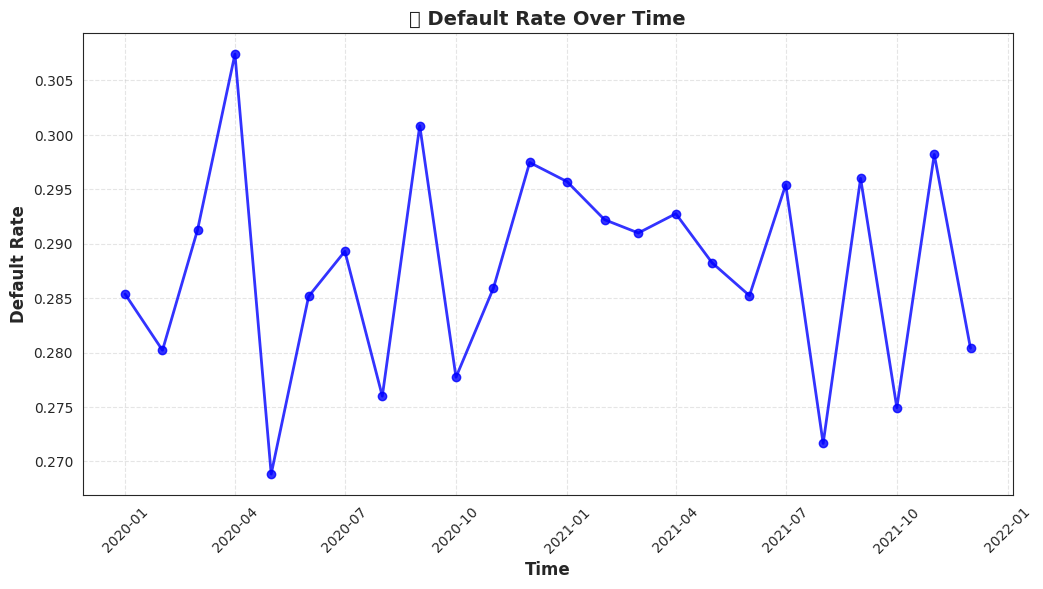

In [16]:
# 📊 Calculate Default Rate Over Time (Grouped by Year & Month)
monthly_default_rate = df.groupby(['year', 'month'])['default'].mean().reset_index()  # Reset index to fix plotting issue

# 🎨 Convert 'year' and 'month' into a datetime format for proper plotting
monthly_default_rate['date'] = pd.to_datetime(monthly_default_rate[['year', 'month']].assign(day=1))

# 🎨 Plot Default Rate Over Time with Improved Styling
plt.figure(figsize=(12, 6))  # Adjust figure size for better visibility
plt.plot(monthly_default_rate['date'],  # X-axis: Time
         monthly_default_rate['default'],  # Y-axis: Default Rate
         marker='o',  # Add markers to emphasize data points
         linestyle='-',  # Solid line for smooth trend
         linewidth=2,  # Make the line more visible
         color='blue',  # Set color to blue
         alpha=0.8)  # Adjust transparency for clarity

# 🎯 Improve axis labels and title readability
plt.xlabel('Time', fontsize=12, fontweight='bold')
plt.ylabel('Default Rate', fontsize=12, fontweight='bold')
plt.title('📊 Default Rate Over Time', fontsize=14, fontweight='bold')

# 📆 Improve Date Formatting on X-axis
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as Year-Month

# 📈 Add Grid for Better Data Analysis
plt.grid(True, linestyle='--', alpha=0.5)

# 🎬 Display the final visualization
plt.show()

# 🎯 **Feature Engineering Opportunities Identified**  

---

## 🔢 **1. Numerical Features**  
💰 **Income & Loan Amount**  
- 📊 Show right skewness → **Apply log transformation** for normalization  
- 📉 High variance? → **Use Standardization (Z-score) or MinMax Scaling**  

📉 **Credit Score**  
- 🚨 Contains outliers → **Apply binning or normalization**  
- 🔍 Investigate correlation with default rate → **Create risk segmentation**  

👷 **Employment Length**  
- ❌ Missing values → **Impute using median or predictive modeling**  
- 📅 Consider grouping → **Short, Medium, Long-term employment categories**  

---

## 🏷️ **2. Categorical Features**  
🎓 **Education**  
- 🔗 Strong relationship with default → **Apply ordinal encoding**  
- 📉 Merge low-frequency categories for better generalization  

🌍 **City**  
- 🏙️ High cardinality → **Use dimensionality reduction techniques (Target Encoding, PCA, Frequency Encoding)**  

💼 **Occupation**  
- 👥 Cluster similar occupations → **Reduce granularity**  
- 💰 Check correlation with income & loan amount  

---

## ⏳ **3. Temporal Features**  
📅 **Monthly Default Patterns**  
- 🔄 **Cyclical encoding** → Use **sine/cosine transformations** for months  
- 📈 Check for **seasonal trends in default rates**  

📆 **Application Recency**  
- 🕒 Newer applications may behave differently → **Create a `days_since_application` feature**  

📊 **Economic Cycles**  
- 📉 Consider **macroeconomic indicators** (e.g., inflation, interest rates) → **Integrate external data**  

---

## 🤝 **4. Potential Interactions**  
💸 **Income & Education**  
- 🏆 **Income-to-education ratio** → How salary varies with degree level  

🏦 **Loan Amount & Income**  
- 📊 **Loan-to-income ratio** → Helps identify high financial burden cases  

💳 **Credit Score & Income**  
- 🔥 **Create risk segments** using both **credit score & income**  

📜 **Loan Term & Interest Rate**  
- 🔍 Analyze relationship → Longer loan terms **correlate with higher interest rates?**  

---

## 🔥 **Bonus Feature Ideas**  
🔍 **Investigate Default Rate by Job Stability**  
- 📅 How does **employment length vs. occupation type** affect defaults?  

🌎 **Geographical Clusters**  
- 🗺️ Use city data to create **regional credit risk segments**  

📈 **Non-Linear Feature Engineering**  
- 🔄 Consider **polynomial features** for complex relationships in loan vs. default rate  

---

🚀 **Next Steps?**  
- ✅ **Prioritize features** with highest predictive power  
- 🔄 **Test transformations & interactions** in baseline ML models  
- 📊 **Analyze feature importance** after model training  

---